In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("C:/Users/ADMIN/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt", sep=";")
df.head()




,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [43]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [44]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Time'] = pd.to_timedelta(df['Time'])


# Add a 'Datetime' column that combines Date and Time
df['Datetime'] = df['Date'] + df['Time']
df.drop(columns=['Date', 'Time'], inplace=True)



In [45]:
df.replace("?", pd.NA, inplace=True)

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')


df.fillna(df.mean(), inplace=True)

In [46]:
# Parse date and time into separate features (Year, Month, Day, Hour, Minute)
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = pd.to_datetime(df['Datetime'].astype(str)).dt.hour
df['Minute'] = pd.to_datetime(df['Datetime'].astype(str)).dt.minute

In [61]:
# Create additional features like daily average of 'Global_active_power' and rolling average
df['Daily_avg'] = df.groupby('Datetime')['Global_active_power'].transform('mean')
df['Rolling_avg'] = df['Global_active_power'].rolling(window=24).mean()
df.fillna(df.mean(), inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
 8   Year                   int32         
 9   Month                  int32         
 10  Day                    int32         
 11  Hour                   int32         
 12  Minute                 int32         
 13  Daily_avg              float64       
 14  Rolling_avg            float64       
dtypes: datetime64[ns](1), float64(9), int32(5)
memory usage: 197.9 MB


In [62]:
# Normalize/Scale the data for better model performance
scaler = StandardScaler()
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']] = scaler.fit_transform(
    df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
)


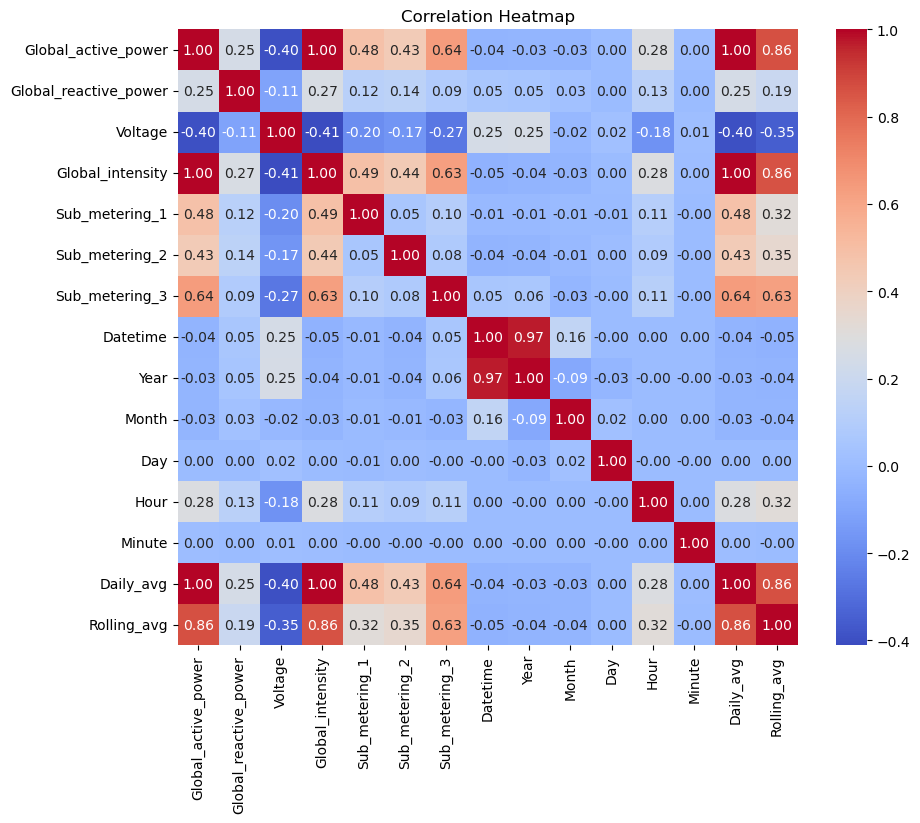

In [63]:
 #Plot a correlation heatmap to explore relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
# Define features (X) and target variable (y)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Daily_avg', 'Rolling_avg', 'Year', 'Month', 'Day', 'Hour']]
y = df['Global_active_power']


In [65]:
 # Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [66]:
# Initializing the ML Model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
# Taking the predictions from the model
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [68]:
# Evaluating the model
from sklearn import metrics
print('Training RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_train, y_train_pred)), 2))
print('Training MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred)), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_test, y_pred)), 2))
print('Testing MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))

Training RMSE : 0.0
Training MAE : 0.0
Training R2 Score : 1.0

Testing RMSE : 0.0
Testing MAE : 0.0
Testing R2 Score : 1.0


In [69]:
# Creating the DecisionTreeRegressor()
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

# Fitting the model 
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
# Taking predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [71]:
# Evaluating the model
from sklearn import metrics
print('Training RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_train, y_train_pred)), 2))
print('Training MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred)), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_test, y_pred)), 2))
print('Testing MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))

Training RMSE : 0.0
Training MAE : 0.0
Training R2 Score : 1.0

Testing RMSE : 0.02
Testing MAE : 0.0
Testing R2 Score : 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Creating the model
rfr = RandomForestRegressor(n_estimators=100,random_state=5)

# Fitting the model
model.fit(X_train, y_train)

In [ ]:
# Taking predictions from the model
y_pred = rfr.predict(X_test)
y_train_pred = rfr.predict(X_train)

In [ ]:
# Evaluating the model
from sklearn import metrics
print('Training RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_train, y_train_pred)), 2))
print('Training MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred)), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_test, y_pred)), 2))
print('Testing MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Creating the model
model = GradientBoostingRegressor(n_estimators=100,random_state=5)

# Fitting the model
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
print('Training RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_train, y_train_pred)), 2))
print('Training MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred)), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_test, y_pred)), 2))
print('Testing MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))